<h2>Install pandas and use it to read the formatted_flights.csv file and create a data frame out of it</h2>

In [3]:
#!pip install -U pandas
import pandas as pd

flights = pd.read_csv('formatted_flights.csv')
print(flights.head(10))

   Unnamed: 0  arr_delay                      name
0           0       11.0     United Air Lines Inc.
1           1       20.0     United Air Lines Inc.
2           2       33.0    American Airlines Inc.
3           3      -18.0           JetBlue Airways
4           4      -25.0      Delta Air Lines Inc.
5           5       12.0     United Air Lines Inc.
6           6       19.0           JetBlue Airways
7           7      -14.0  ExpressJet Airlines Inc.
8           8       -8.0           JetBlue Airways
9           9        8.0    American Airlines Inc.


<h2>Create a function to take a sample of size n from the flights data and calculate its mean and standard deviation</h2>

In [ ]:
def get_samples(flights, sample_size):
  sample = flights.sample(n=sample_size)
  delays = sample['arr_delay']
  mean = delays.mean()
  std = delays.std()
  return {'mean': mean, 'std': std}

print(get_samples(flights, 30))

<h2>Take from the distribution repeated samples of size n. Calculate each sample's mean to form a distribution of the means. Plot each sampling distribution overlapping the normal distribution that has the mean and the std of que population.</h2>

<h3>Reapeating this process several times with higher values of n and plotting the results allows you to visualize the four aspects of the central limit theorem:</h3>

1) The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn. Even the first plot, when the sample size is samall (n = 2), the std of the samples is lower than the population std.

2) The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger samples sizes). With a small sample size (n = 2) the sampling distribution doesn't quite look like a normal distribution. But, as the sample size increases, the distribution turns into a bell shaped curve.

3) The spread of the sampling distribution is related to the spread of the population values (mean = mu, std dev = sigma / sqrt(n)). As n increases, the std of the sampling distribution gets closer to the population's std over the squared root of n.

4) Bigger samples lead to a smaller spread in the sampling distribution (self evident from 3). Also, the plots with higher sample size have a lower std.

Population mean: 1.3
Population stantard deviation: 29.06


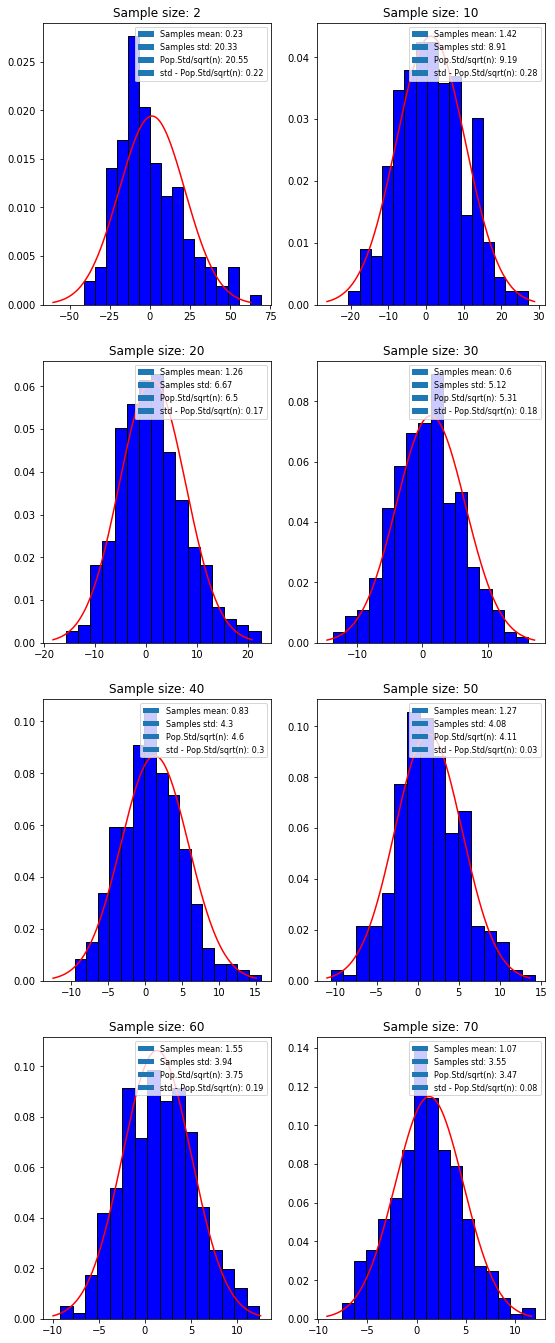

In [12]:
#!pip install -U matplotlib
#!pip install -U scipy 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm
import math

population_mean = flights['arr_delay'].mean()
population_std = flights['arr_delay'].std()
print('Population mean: {0}'.format(round(population_mean, 2)))
print('Population stantard deviation: {0}'.format(round(population_std, 2)))

iterations = 8
number_of_samples = 300
figure, a = plt.subplots(int(iterations / 2), 2, figsize=(9, 9))
a = a.ravel()
for idx, ax in enumerate(a, start=0):
  sample_size = 2 if idx is 0 else 10 * idx
  samples = []
  
  for x in range(number_of_samples):
    samples.append(get_samples(flights, sample_size))
    
  means = [x['mean'] for x in samples]
  ax.hist(means, color='blue', edgecolor='black', bins=16, density=True)
  std = population_std / (math.sqrt(sample_size))
  x_axis = np.arange(-3 * std + population_mean, 3 * std + population_mean, 0.03)
  ax.set_title('Sample size: {0}'.format(sample_size))
  ax.plot(x_axis, norm.pdf(x_axis, population_mean, std), color='red')
  
  sample_mean = np.mean(means)
  sample_std = np.std(means)
  adjusted_std = population_std / math.sqrt(sample_size)
  std_diff = abs(sample_std - adjusted_std)
  
  mean_patch = mpatches.Patch(color=None, label='Samples mean: {0}'.format(round(sample_mean, 2)))
  std_patch = mpatches.Patch(color=None, label='Samples std: {0}'.format(round(sample_std, 2)))
  adjusted_std_patch = mpatches.Patch(color=None, label='Pop.Std/sqrt(n): {0}'.format(round(adjusted_std, 2)))
  std_diff_patch = mpatches.Patch(color=None, label='std - Pop.Std/sqrt(n): {0}'.format(round(std_diff, 2)))
  
  ax.legend(handles=[mean_patch,
                     std_patch,
                     adjusted_std_patch,
                     std_diff_patch], loc='upper right', prop={'size': 8})
  
figure.subplots_adjust(top=3, bottom=1)
plt.show()

